In [1]:
#importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


/kaggle/input/breast-cancerdata/data.csv


In [2]:
df = pd.read_csv('data.csv')
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [3]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

# Data Handling

In [4]:
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [5]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [6]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

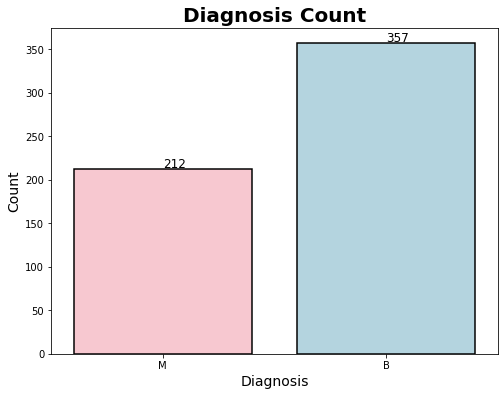

In [7]:
plt.figure(figsize=(8, 6))

sns.countplot(x='diagnosis', data=df, palette= ['#FFC0CB', '#ADD8E6'], edgecolor='black', linewidth=1.5)

plt.title('Diagnosis Count', fontsize=20, fontweight='bold')
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Count', fontsize=14)

ax = plt.gca()

for patch in ax.patches:
    plt.text(x=patch.get_x()+0.4, y=patch.get_height()+2, s=str(int(patch.get_height())), fontsize=12)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

<AxesSubplot:>

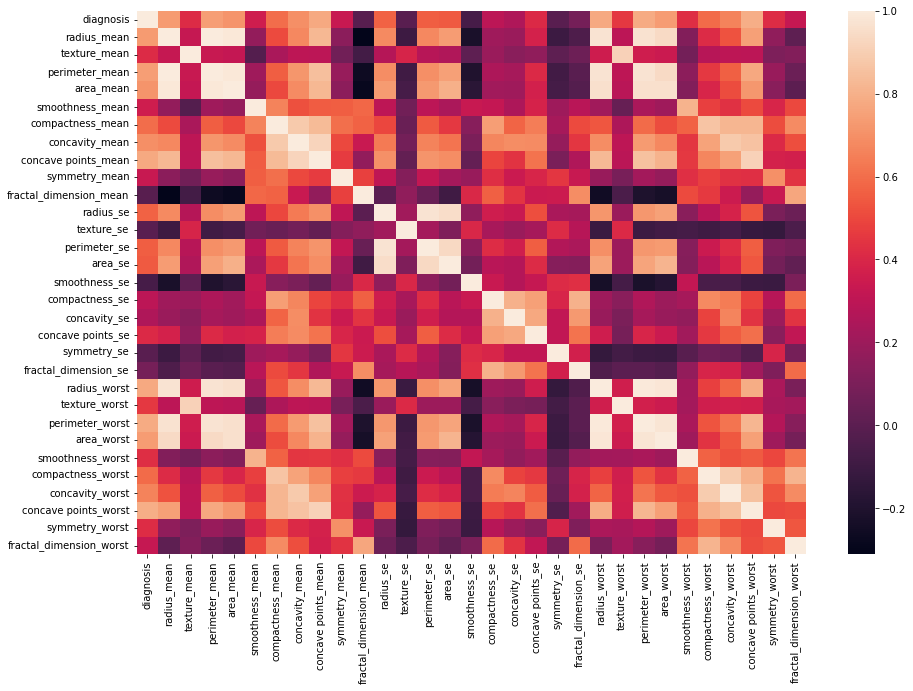

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

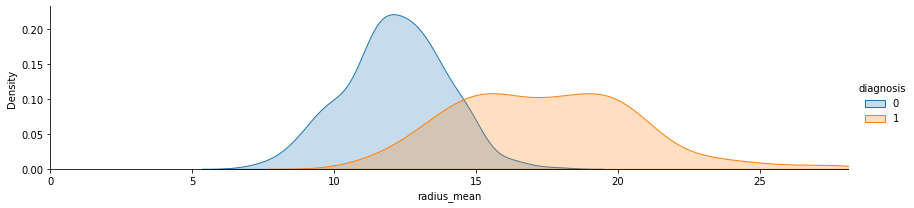

In [10]:
def plot_distribution(df, var, target, **kwargs):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sns.FacetGrid(df, hue=target, aspect=4, row=row, col=col)
    facet.map(sns.kdeplot, var, shade=True)
    facet.set(xlim=(0, df[var].max()))
    facet.add_legend()
    plt.show()
plot_distribution(df, var='radius_mean', target='diagnosis')

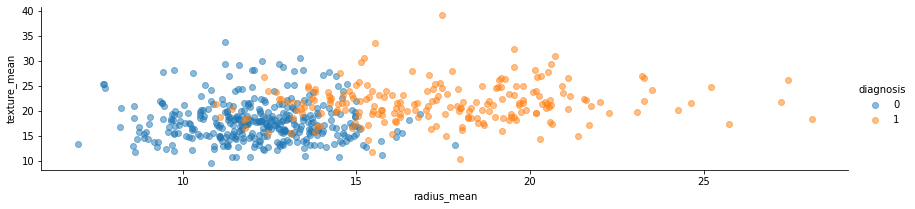

In [11]:
def plot_scatter(df, var1, var2, target, **kwargs):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sns.FacetGrid(df, hue=target, aspect=4, row=row, col=col)
    facet.map(plt.scatter, var1, var2, alpha=0.5)
    facet.add_legend()
    plt.show()
plot_scatter(df, var1='radius_mean', var2='texture_mean', target='diagnosis')

In [12]:
import plotly.express as px
fig = px.parallel_coordinates(df, dimensions=['radius_mean', 'texture_mean', 'perimeter_mean', 
      'area_mean', 'smoothness_mean', 'compactness_mean', 
      'concavity_mean', 'concave points_mean', 'symmetry_mean', 
      'fractal_dimension_mean'],
      color='diagnosis', color_continuous_scale=px.colors.sequential.Plasma, 
      labels={'radius_mean': 'Radius Mean', 'texture_mean': 'Texture Mean', 
       'perimeter_mean': 'Perimeter Mean', 'area_mean': 'Area Mean', 
       'smoothness_mean': 'Smoothness Mean', 'compactness_mean': 'Compactness Mean', 
       'concavity_mean': 'Concavity Mean', 'concave points_mean': 'Concave Points Mean', 
       'symmetry_mean': 'Symmetry Mean', 'fractal_dimension_mean': 'Fractal Dimension Mean'},
        title='Breast Cancer Diagnosis by Mean Characteristics')

fig.show()

In [13]:
from sklearn.feature_selection import SelectKBest, f_classif
# Spliting the data into features and target
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']
selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X, y)
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices].tolist()
# Printing the selected features
print(selected_features)

['perimeter_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst']


In [14]:
features = df[['perimeter_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst']]
target = df['diagnosis']

In [15]:
target.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

<h1>Standardisation</h1>

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
yhat = LR.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
LR_accuracy = accuracy_score(y_test, yhat)
LR_accuracy

0.9122807017543859

# Support Vector Classifier

In [20]:
from sklearn import svm
sv = svm.SVC()
sv.fit(X_train, y_train)
sv_predict = sv.predict(X_test)
svm_accuracy = accuracy_score(y_test, sv_predict)
svm_accuracy

0.9005847953216374

# K Nearest Neighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predict)
knn_accuracy

0.9122807017543859

# Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_test)
dtc_accuracy = accuracy_score(y_test, dtc_predict)
dtc_accuracy

0.8888888888888888

[Text(0.5528846153846154, 0.9444444444444444, 'X[3] <= 0.11\ngini = 0.453\nsamples = 398\nvalue = [260, 138]'),
 Text(0.28846153846153844, 0.8333333333333334, 'X[4] <= 0.849\ngini = 0.101\nsamples = 263\nvalue = [249, 14]'),
 Text(0.25, 0.7222222222222222, 'X[2] <= -0.081\ngini = 0.06\nsamples = 257\nvalue = [249, 8]'),
 Text(0.15384615384615385, 0.6111111111111112, 'X[0] <= 0.153\ngini = 0.026\nsamples = 232\nvalue = [229, 3]'),
 Text(0.07692307692307693, 0.5, 'X[1] <= -0.555\ngini = 0.017\nsamples = 228\nvalue = [226, 2]'),
 Text(0.038461538461538464, 0.3888888888888889, 'gini = 0.0\nsamples = 153\nvalue = [153, 0]'),
 Text(0.11538461538461539, 0.3888888888888889, 'X[1] <= -0.544\ngini = 0.052\nsamples = 75\nvalue = [73, 2]'),
 Text(0.07692307692307693, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.15384615384615385, 0.2777777777777778, 'X[4] <= -0.609\ngini = 0.027\nsamples = 74\nvalue = [73, 1]'),
 Text(0.11538461538461539, 0.16666666666666666, 'X[0] <= -0

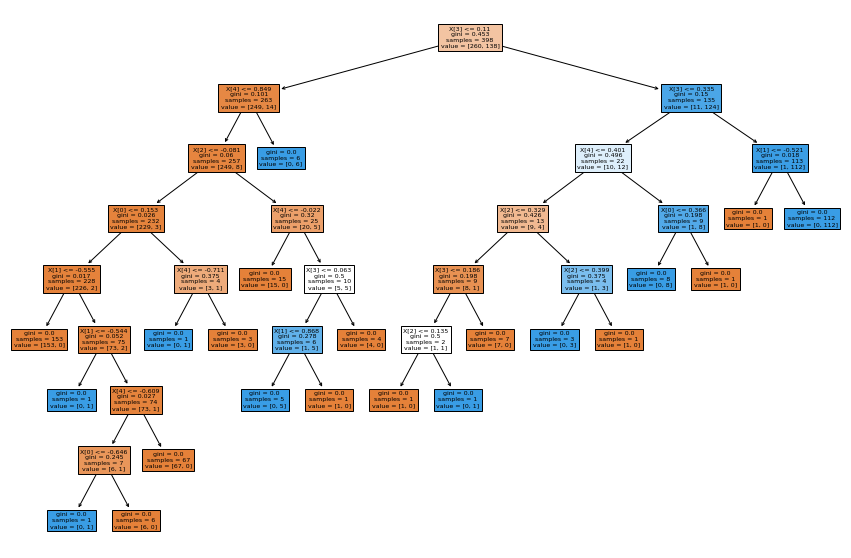

In [23]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtc, filled=True)

# Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)
rfc_accuracy = accuracy_score(y_test, rfc_predict)
rfc_accuracy

0.9239766081871345

[Text(0.4230769230769231, 0.9444444444444444, 'X[2] <= 0.038\ngini = 0.442\nsamples = 259\nvalue = [267, 131]'),
 Text(0.15384615384615385, 0.8333333333333334, 'X[2] <= -0.249\ngini = 0.106\nsamples = 176\nvalue = [253, 15]'),
 Text(0.07692307692307693, 0.7222222222222222, 'gini = 0.0\nsamples = 140\nvalue = [208, 0]'),
 Text(0.23076923076923078, 0.7222222222222222, 'X[4] <= 0.849\ngini = 0.375\nsamples = 36\nvalue = [45, 15]'),
 Text(0.15384615384615385, 0.6111111111111112, 'X[2] <= -0.246\ngini = 0.208\nsamples = 33\nvalue = [45, 6]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.23076923076923078, 0.5, 'X[2] <= -0.089\ngini = 0.18\nsamples = 32\nvalue = [45, 5]'),
 Text(0.15384615384615385, 0.3888888888888889, 'gini = 0.0\nsamples = 18\nvalue = [30, 0]'),
 Text(0.3076923076923077, 0.3888888888888889, 'X[4] <= -0.042\ngini = 0.375\nsamples = 14\nvalue = [15, 5]'),
 Text(0.23076923076923078, 0.2777777777777778, 'gini = 0.0\nsamples = 6\nvalue = [

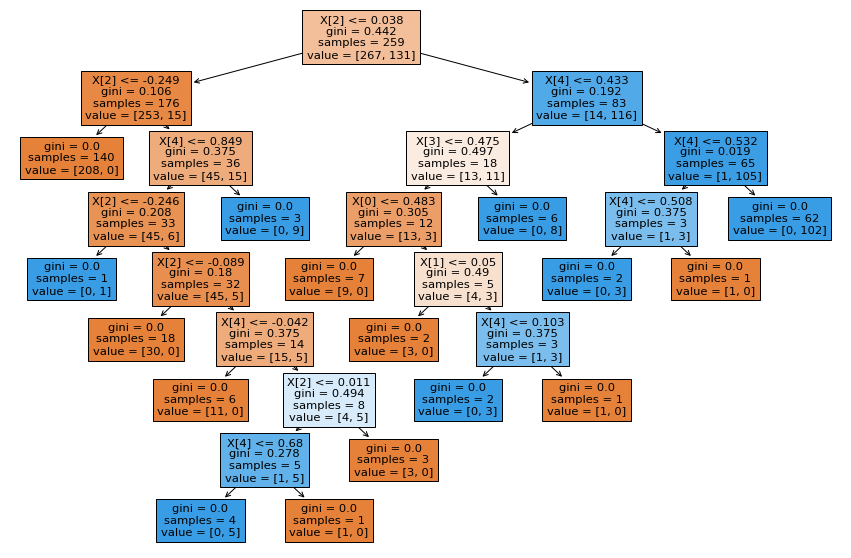

In [25]:
plt.figure(figsize=(15,10))
tree.plot_tree(rfc.estimators_[0], filled=True)

In [26]:
results = pd.DataFrame()
tempResults = pd.DataFrame({'Algorithm':['KNN', 'Logistic Regression', 'SVM', 'Random Forest Classifier', 'Decision Tree Classifier'], 'Accuracy':[knn_accuracy, LR_accuracy, svm_accuracy, rfc_accuracy, dtc_accuracy]})
results = tempResults[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,KNN,0.912281
1,Logistic Regression,0.912281
2,SVM,0.900585
3,Random Forest Classifier,0.923977
4,Decision Tree Classifier,0.888889


Since the accuracy of Logistic Regression is highest, we will prefer it for our model.

# Anomaly Detection

In [27]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
# Fiting an Isolation Forest model on the training data
clf = IsolationForest(n_estimators=100, max_samples="auto", contamination="auto", random_state=42)
clf.fit(X_train)
y_pred = clf.predict(X_test)
y_pred = np.where(y_pred == -1, 1, 0)  # Converting -1 (outlier) to 1, and 1 (inlier) to 0
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

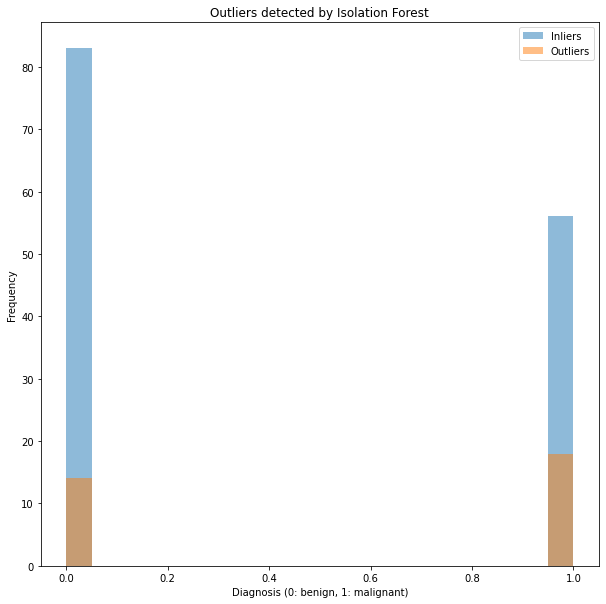

In [28]:
plt.figure(figsize=(10,10))
plt.hist(y_test[y_pred==0], bins=20, alpha=0.5, label="Inliers")
plt.hist(y_test[y_pred==1], bins=20, alpha=0.5, label="Outliers")
plt.xlabel("Diagnosis (0: benign, 1: malignant)")
plt.ylabel("Frequency")
plt.title("Outliers detected by Isolation Forest")
plt.legend()
plt.show()

In [29]:
import plotly.graph_objs as go
from sklearn.neighbors import LocalOutlierFactor

model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
model.fit(X)

# Predicting anomalies
y_pred1 = model.fit_predict(X)

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=X.iloc[:, 0],
        y=X.iloc[:, 1],
        mode='markers',
        marker=dict(
            color=y_pred1,
            colorscale='viridis'
        ),
        hovertemplate='Feature 1: %{x}<br>Feature 2: %{y}<extra></extra>'
    )
)

fig.update_layout(
    title='Local Outlier Factor Anomaly Detection',
    xaxis_title='Feature 1',
    yaxis_title='Feature 2'
)

# Adding legend annotations
normal_points = go.Scatter(x=[], y=[], mode='markers', marker=dict(color='yellow'), showlegend=True, name='Normal')
anomaly_points = go.Scatter(x=[], y=[], mode='markers', marker=dict(color='darkviolet'), showlegend=True, name='Anomaly')

for i in range(len(X)):
    if y_pred1[i] == 1:
        normal_points['x'] += (X.iloc[i, 0],)
        normal_points['y'] += (X.iloc[i, 1],)
    else:
        anomaly_points['x'] += (X.iloc[i, 0],)
        anomaly_points['y'] += (X.iloc[i, 1],)

fig.add_trace(normal_points)
fig.add_trace(anomaly_points)

fig.show()

<h1>THE END</h1>